In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"]='1'
import warnings
warnings.filterwarnings(action='ignore') # setting ignore as a parameter.


In [2]:
dataset=pd.read_csv('Raisin_Dataset.csv')

In [3]:
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
# to display stats about data
dataset.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [5]:
dataset.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [6]:
dataset.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
dataset['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

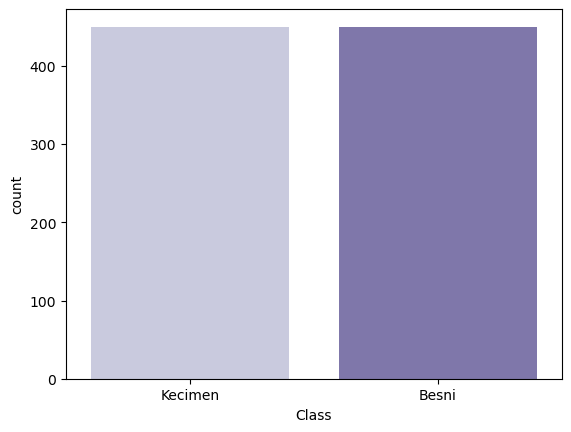

In [9]:
sns.countplot(x='Class',data=dataset,palette='Purples')
plt.show()

In [10]:
# check for null values
dataset.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

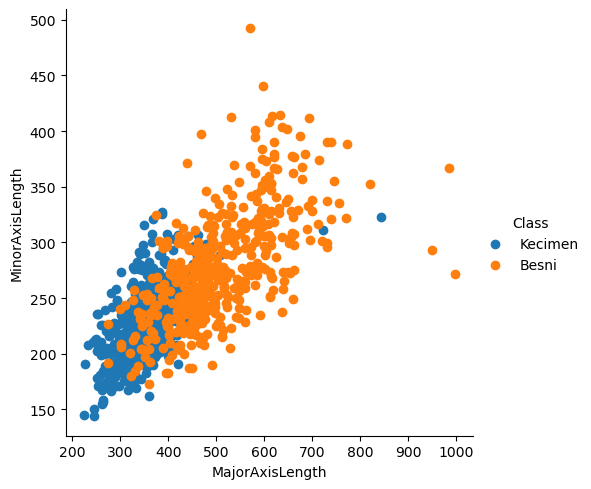

In [11]:
#2D Scatterplot with colour Coding for each class type
sns.FacetGrid(dataset,hue='Class',size=5) \
    .map(plt.scatter,'MajorAxisLength','MinorAxisLength') \
     .add_legend();
plt.show();

In [12]:
dataset.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


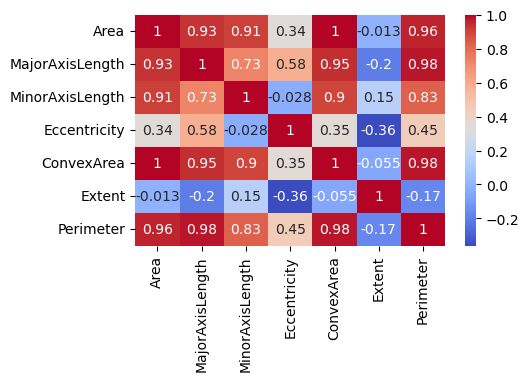

In [13]:
corr=dataset.corr()
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')
plt.show()

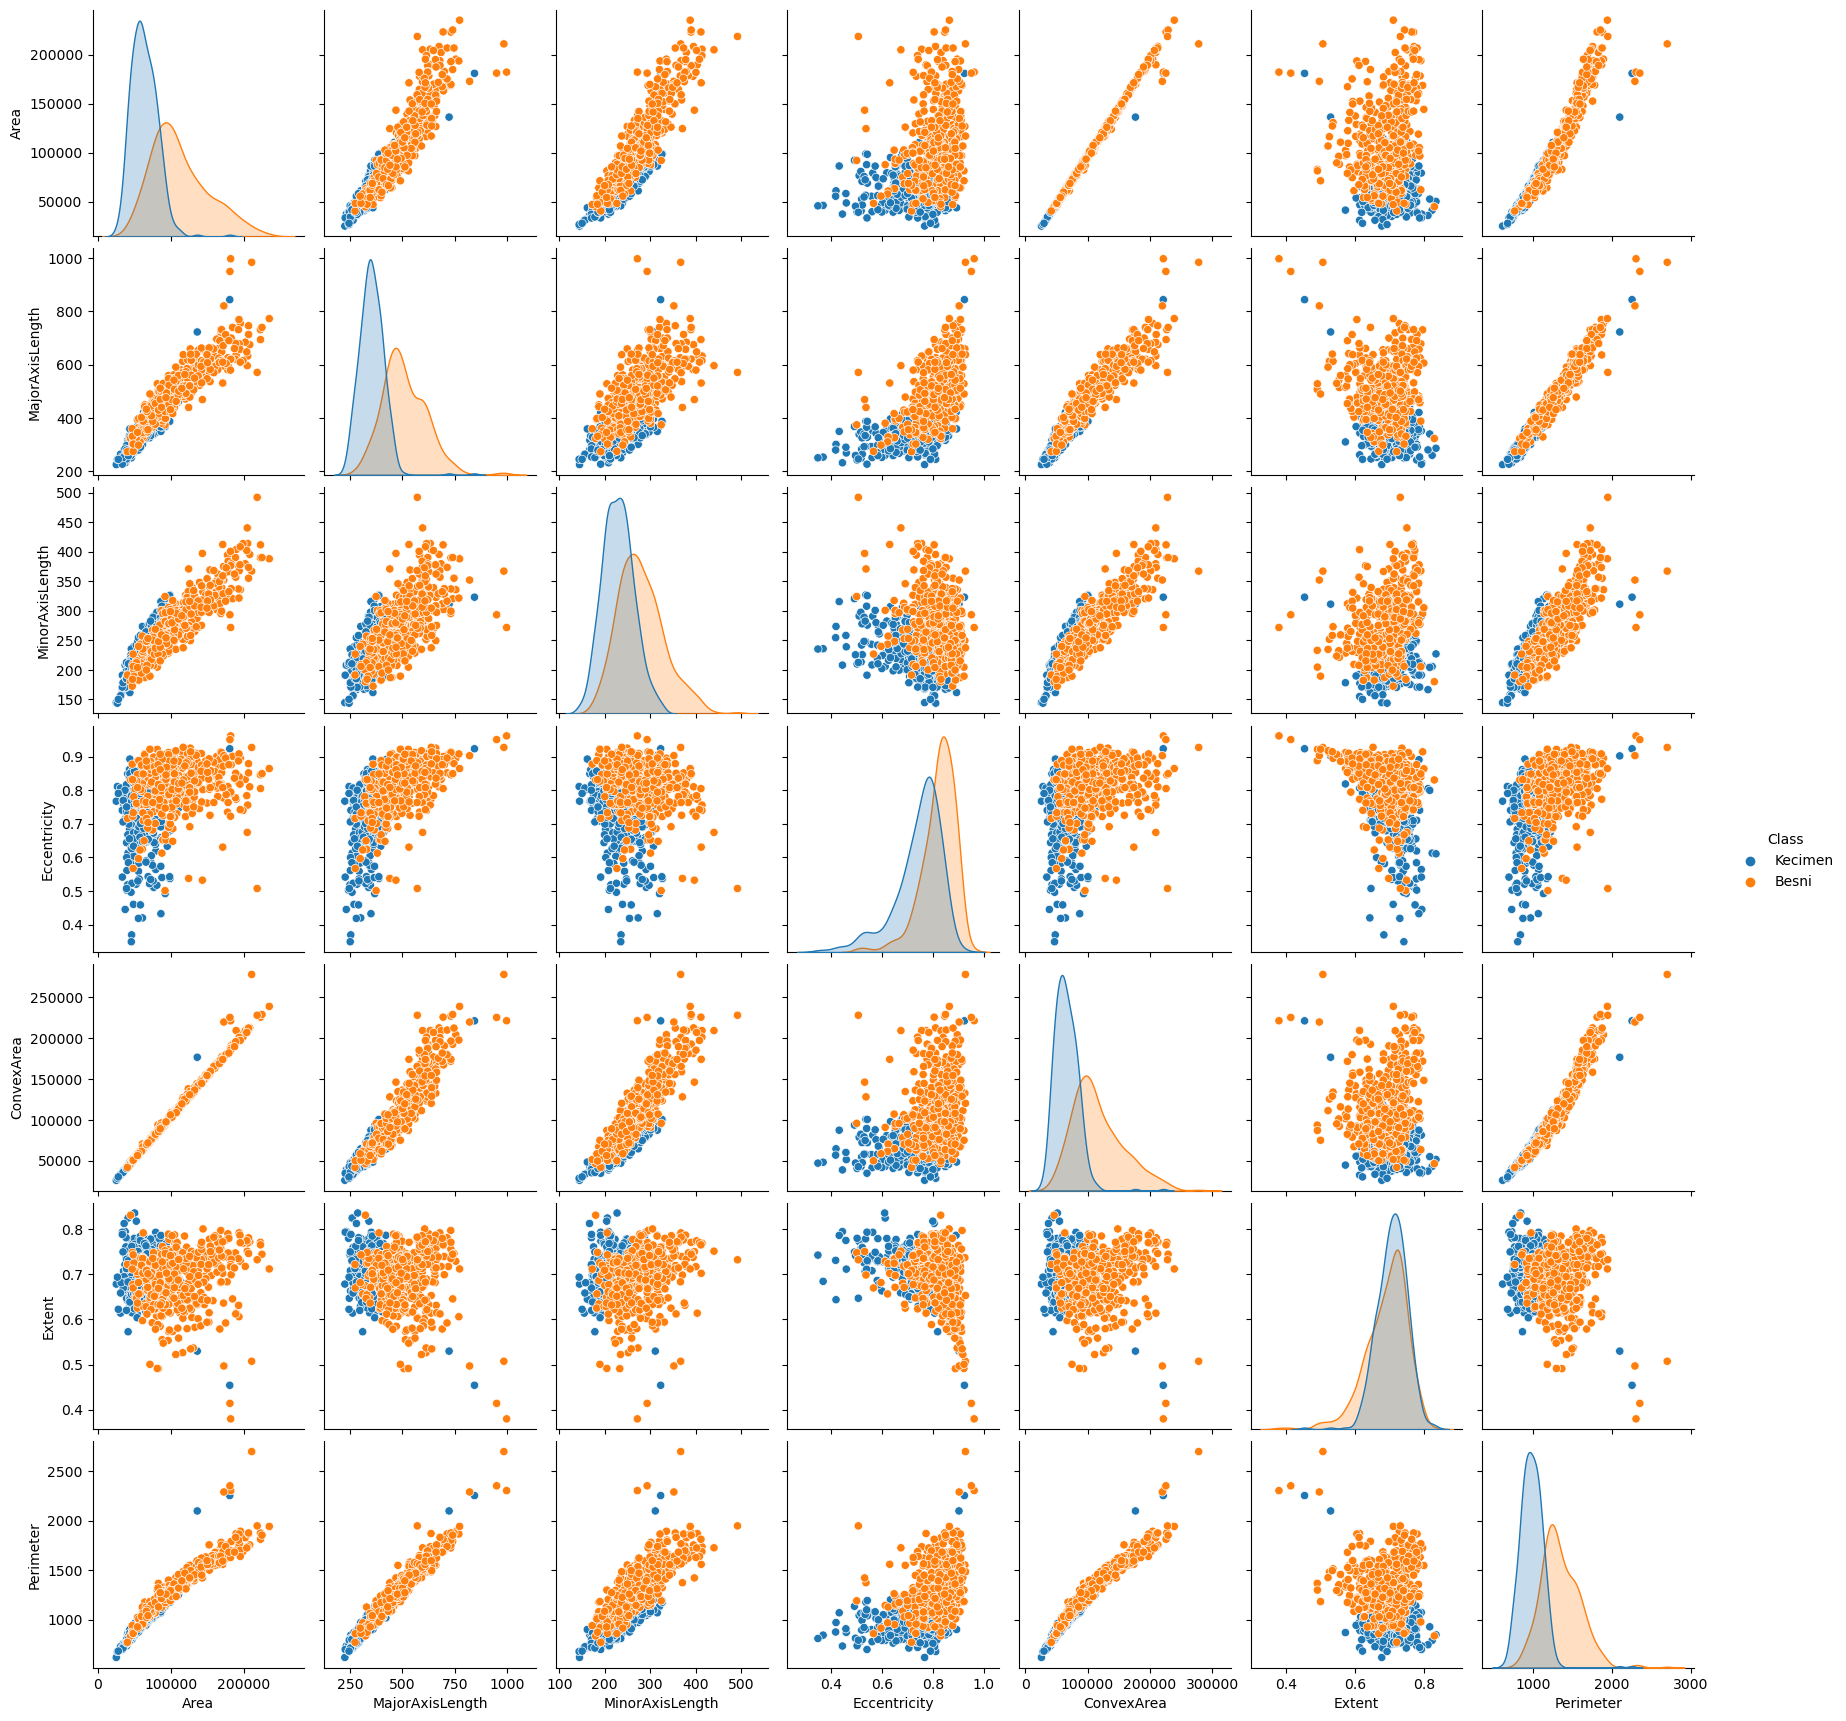

In [14]:
sns.pairplot(dataset,hue='Class')
plt.show()

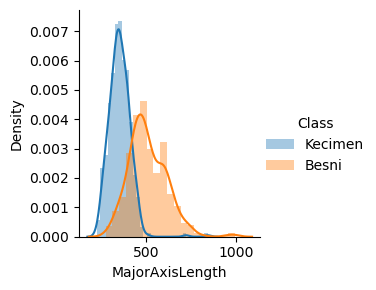

In [15]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'MajorAxisLength') \
     .add_legend();
plt.show();

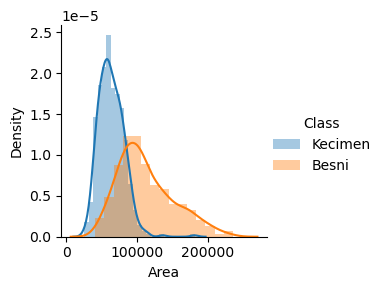

In [16]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'Area') \
     .add_legend();
plt.show();

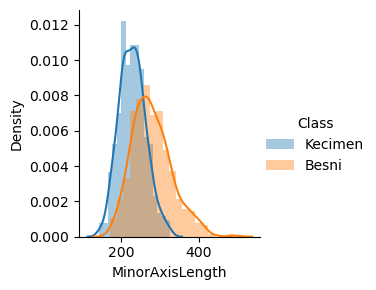

In [17]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'MinorAxisLength') \
     .add_legend();
plt.show();

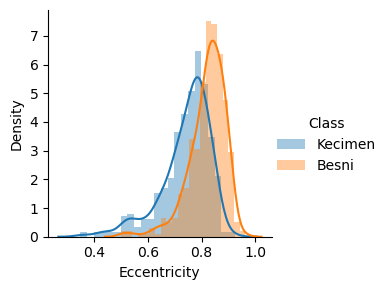

In [18]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'Eccentricity') \
     .add_legend();
plt.show();

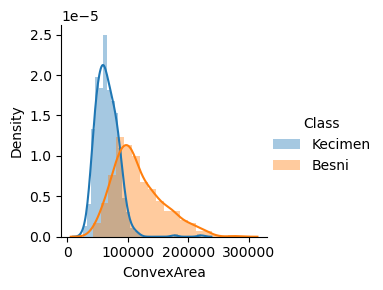

In [19]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'ConvexArea') \
     .add_legend();
plt.show();

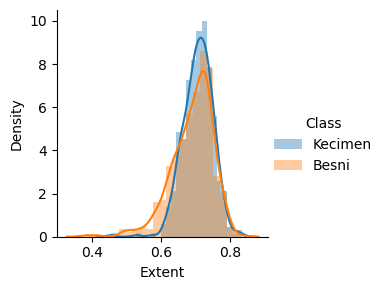

In [20]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'Extent') \
     .add_legend();
plt.show();

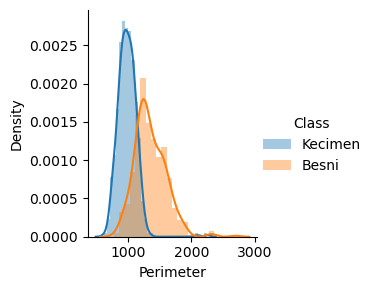

In [21]:
sns.FacetGrid(dataset,hue='Class') \
    .map(sns.distplot,'Perimeter') \
     .add_legend();
plt.show();

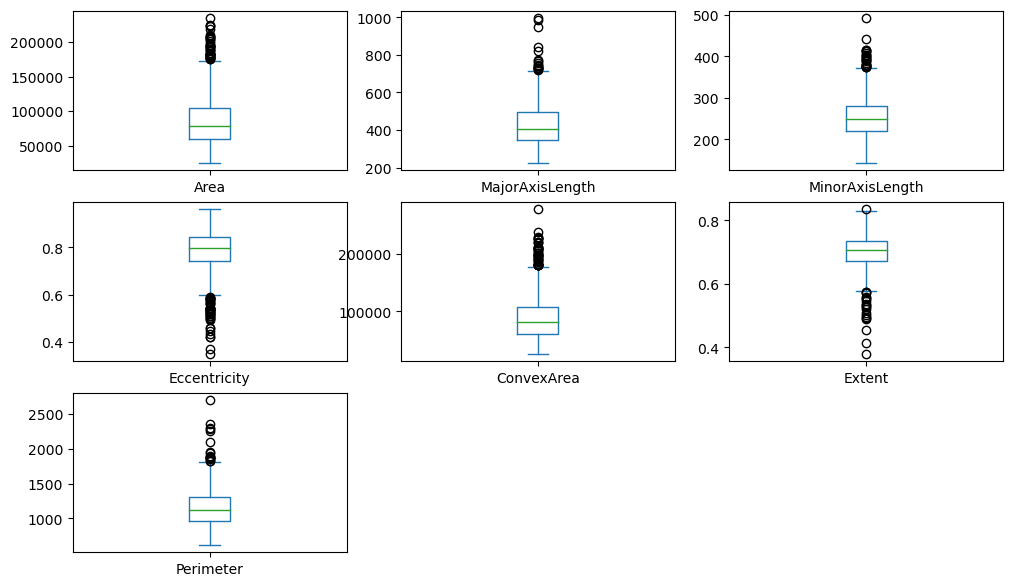

In [22]:
dataset.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

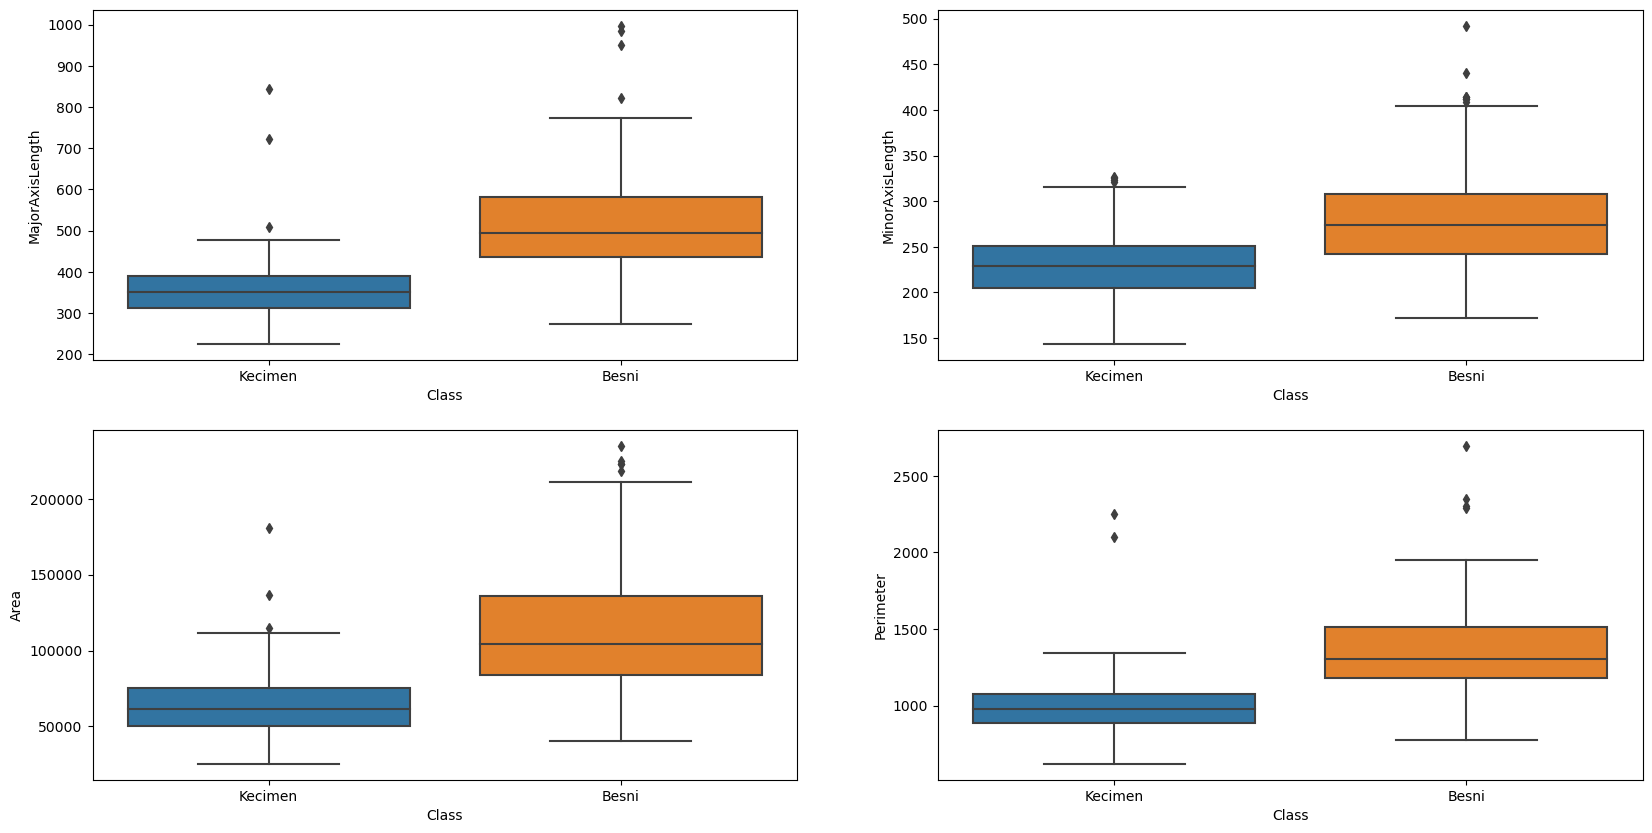

In [23]:
fig, axis = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(x='Class', y='MajorAxisLength', data=dataset, ax=axis[0,0])
sns.boxplot(x='Class', y='MinorAxisLength', data=dataset, ax=axis[0,1])
sns.boxplot(x='Class', y='Area', data=dataset, ax=axis[1,0])
sns.boxplot(x='Class', y='Perimeter', data=dataset, ax=axis[1,1])

plt.show()


In [24]:
X=dataset.drop('Class',axis=1)

# Kmeans Clustering

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

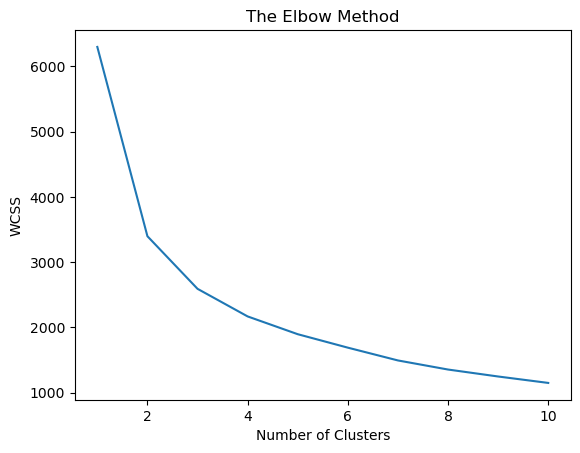

In [42]:
wcss=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.69032694, 0.20759835])

In [29]:
sum(pca.explained_variance_ratio_)

0.8979252929009323

In [43]:
kmeans =KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [44]:
kmeans.cluster_centers_

array([[ 0.15282601,  0.29459035,  0.12511082,  0.41041329,  0.1521659 ,
        -0.25778771,  0.26981659],
       [-0.75565339, -0.81485472, -0.63774576, -0.53286492, -0.75445398,
         0.20156608, -0.80636061],
       [ 1.89473921,  1.71776308,  1.60879633,  0.57731022,  1.89277865,
         0.03871783,  1.75427153]])

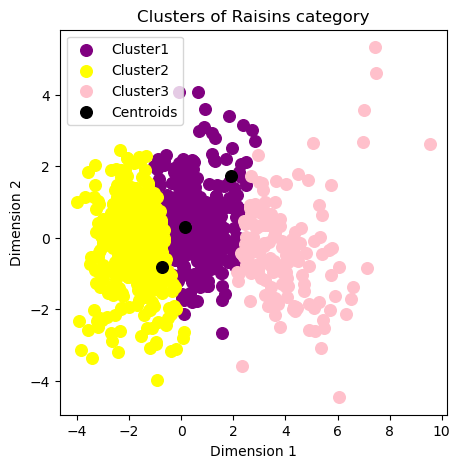

In [45]:
colours=['purple','yellow','pink']
plt.figure(figsize=(5,5))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i,0],X_reduced[y_kmeans==i,1],s=70,c=colours[i],label='Cluster'+str(i+1))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,c='black',label='Centroids')
plt.title('Clusters of Raisins category')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

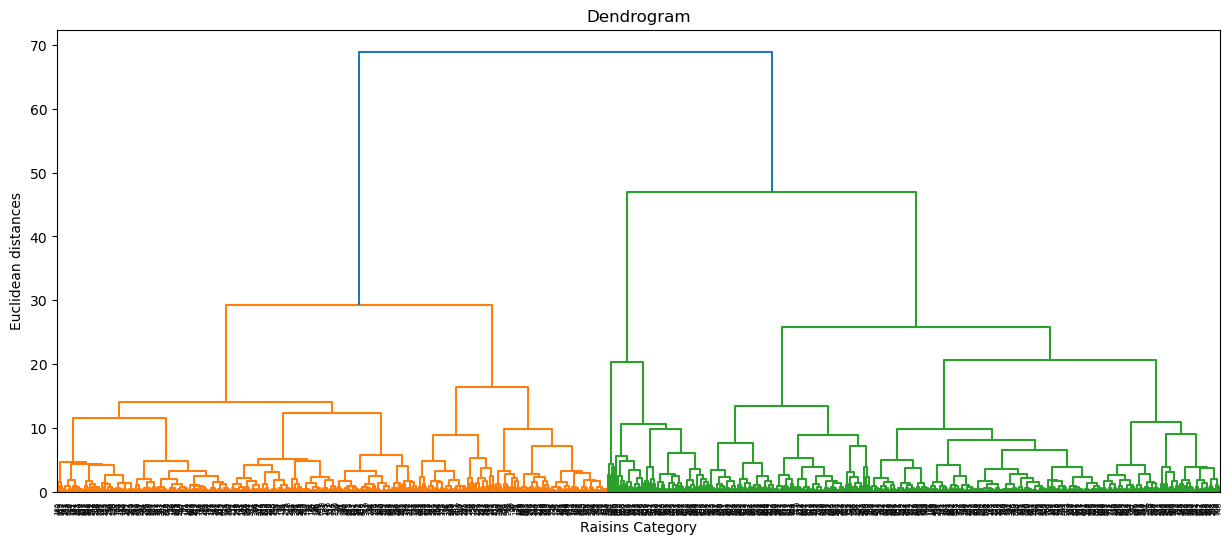

In [33]:
#Dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Raisins Category')
plt.ylabel('Euclidean distances')
plt.show()

# Agglomerative Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward' )
y_hc=hc.fit_predict(X)

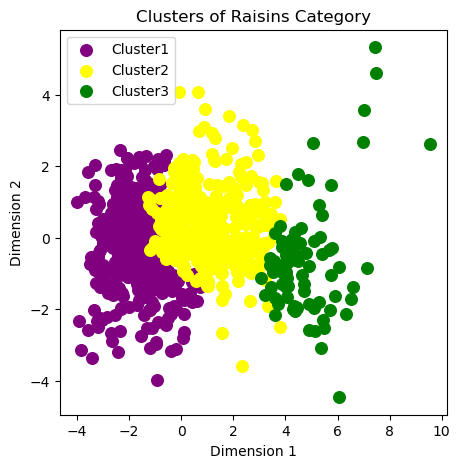

In [39]:
colours=['purple','yellow','green']
plt.figure(figsize=(5,5))
for i in range(3):
    plt.scatter(X_reduced[y_hc==i,0],X_reduced[y_hc==i,1],s=70,c=colours[i],label='Cluster'+str(i+1))
plt.title('Clusters of Raisins Category')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# DBSCAN

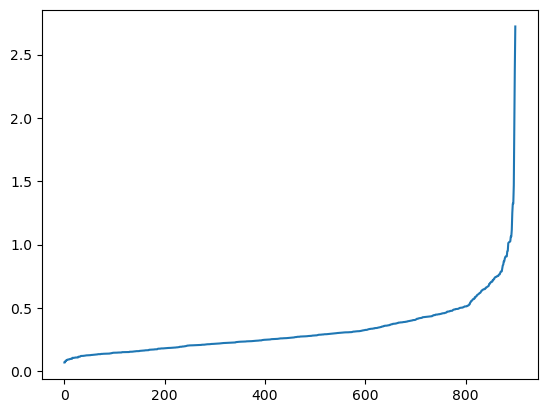

In [64]:
from sklearn.neighbors import NearestNeighbors

neighbors=NearestNeighbors(n_neighbors=2)
distances,indices=neighbors.fit(X).kneighbors(X)

distances=distances[:,1]
distances=np.sort(distances,axis=0)
plt.plot(distances)

In [68]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.75,min_samples=5)
y_dbscan=dbscan.fit_predict(X)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

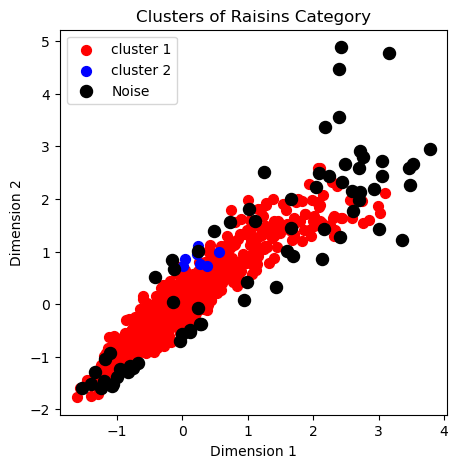

In [70]:
plt.figure(figsize=(5,5))
plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],s=50,c='blue',label='cluster 2')
plt.scatter(X[y_dbscan==-1,0],X[y_dbscan==-1,1],s=75,c='black',label='Noise')
plt.title('Clusters of Raisins Category')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()